# Iris Dataset | Exploration and Visualization
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

In [15]:
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style="white", color_codes=True)

In [9]:
# Load the Iris dataset
# https://archive.ics.uci.edu/ml/datasets/Iris
iris = pd.read_csv('input/iris.csv', header=None, names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
#iris['SepalLengthCm'] = iris.apply(lambda row: None if row['SepalWidthCm'] = 2.3 else row['SepalLengthCm'], axis = 1)

In [10]:
# Let's see what's in the Iris dataset
#print iris[iris['SepalWidthCm'] == 2.3]
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,5.8,2.8,5.1,2.4,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica


In [11]:
# Check the data types
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
# Check the count for each class
iris["Species"].value_counts()
#iris.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
# Descriptive statistics for each attribute
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


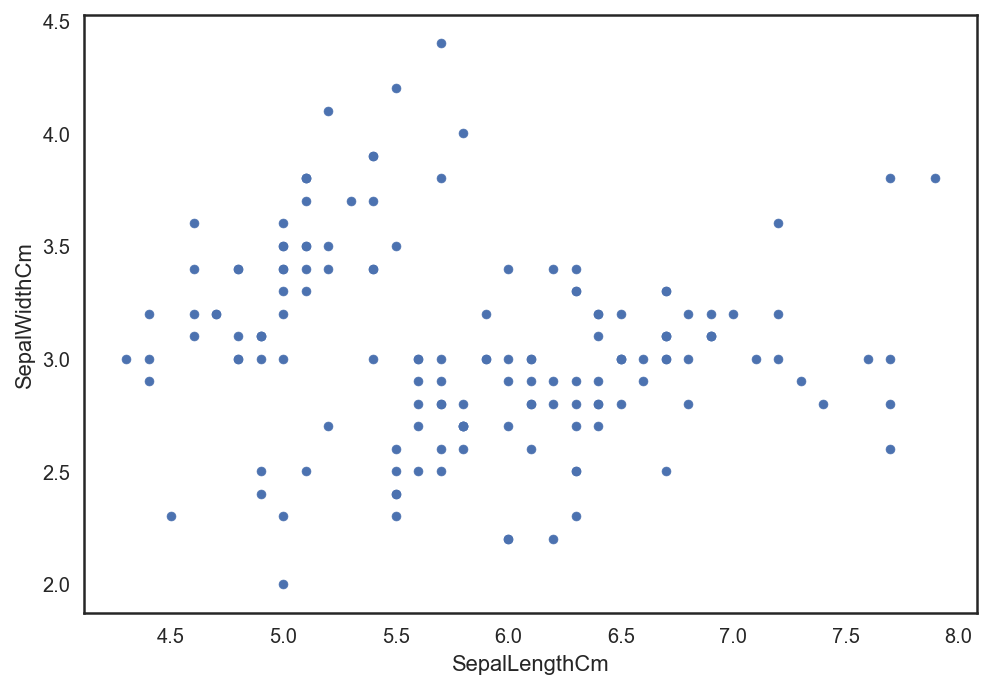

In [14]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

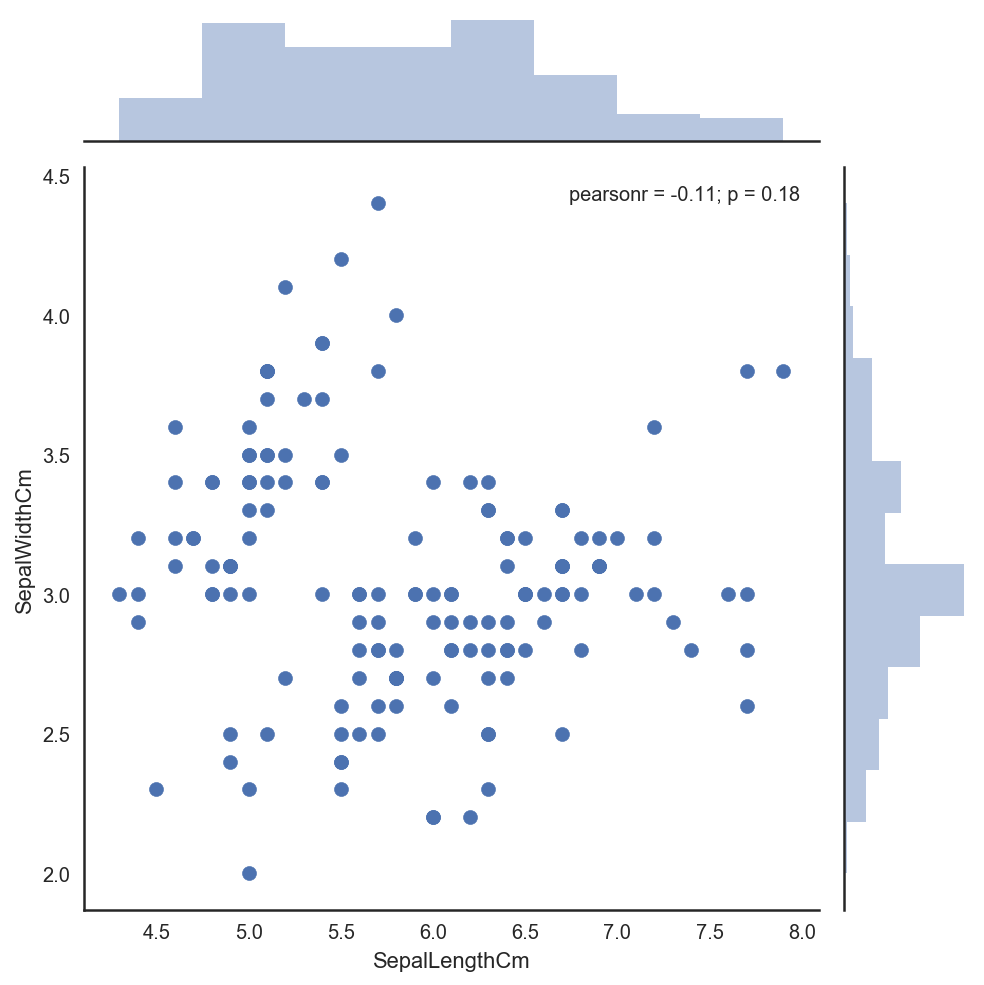

In [16]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=7)

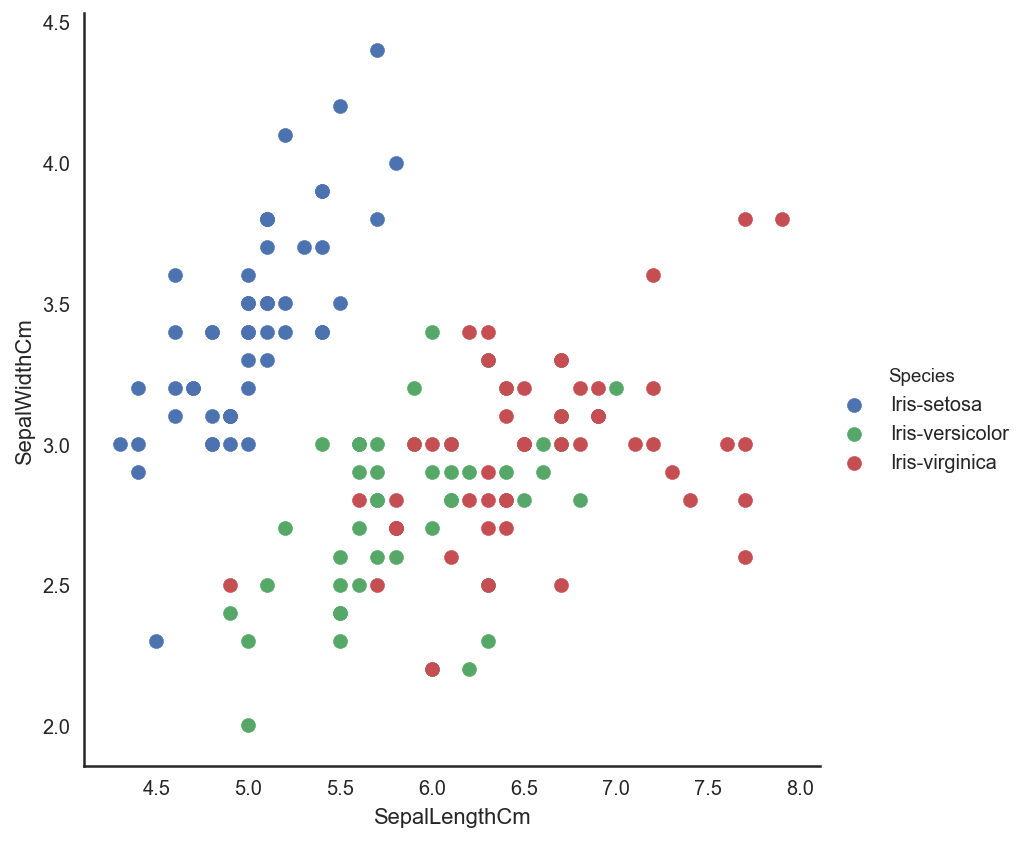

In [17]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=6).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

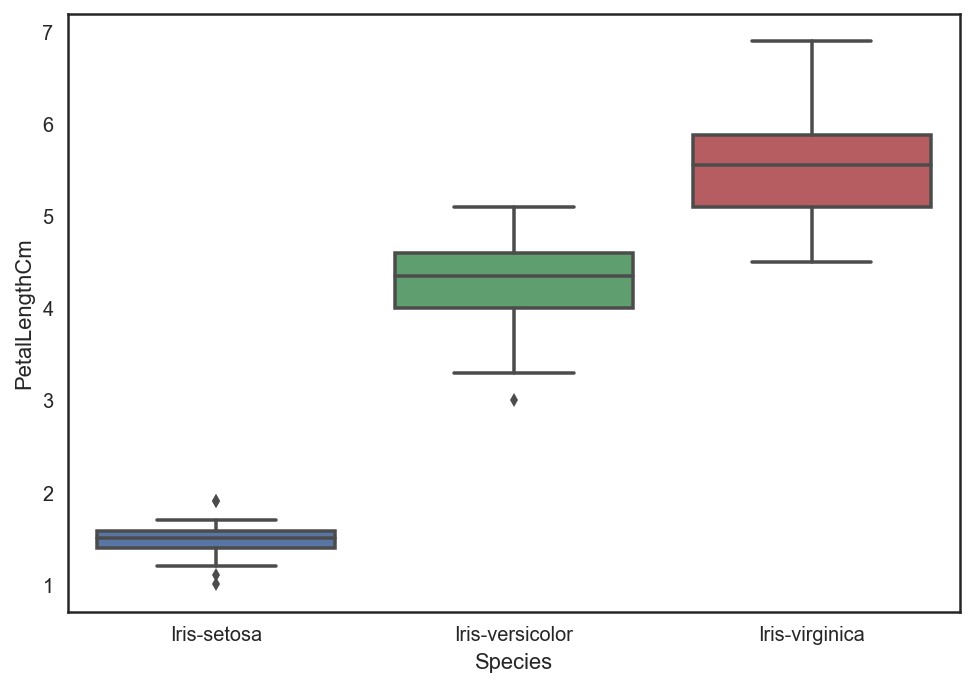

In [18]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

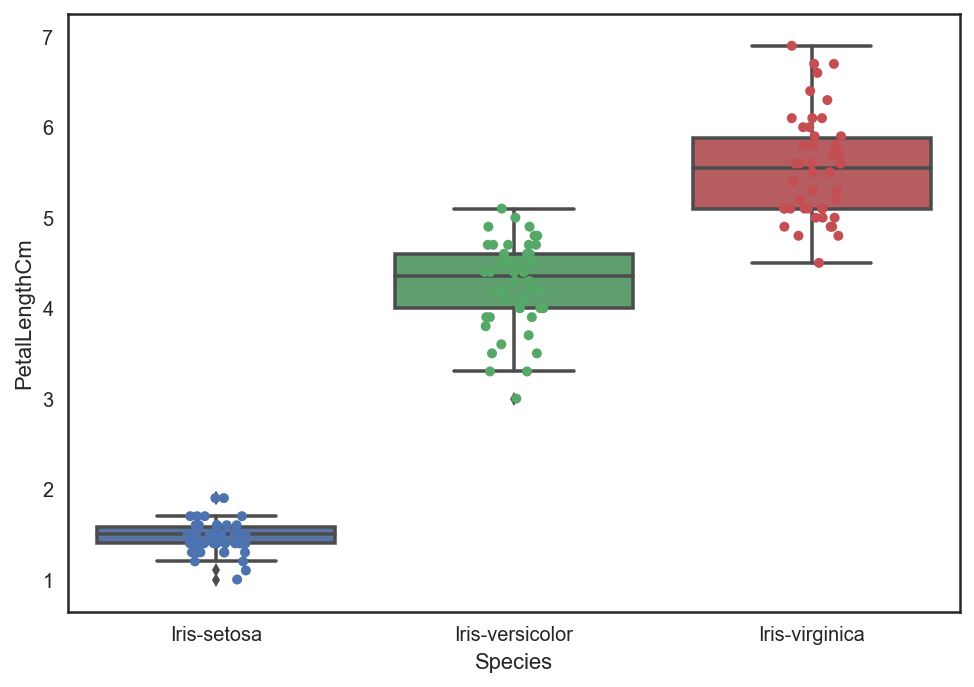

In [19]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

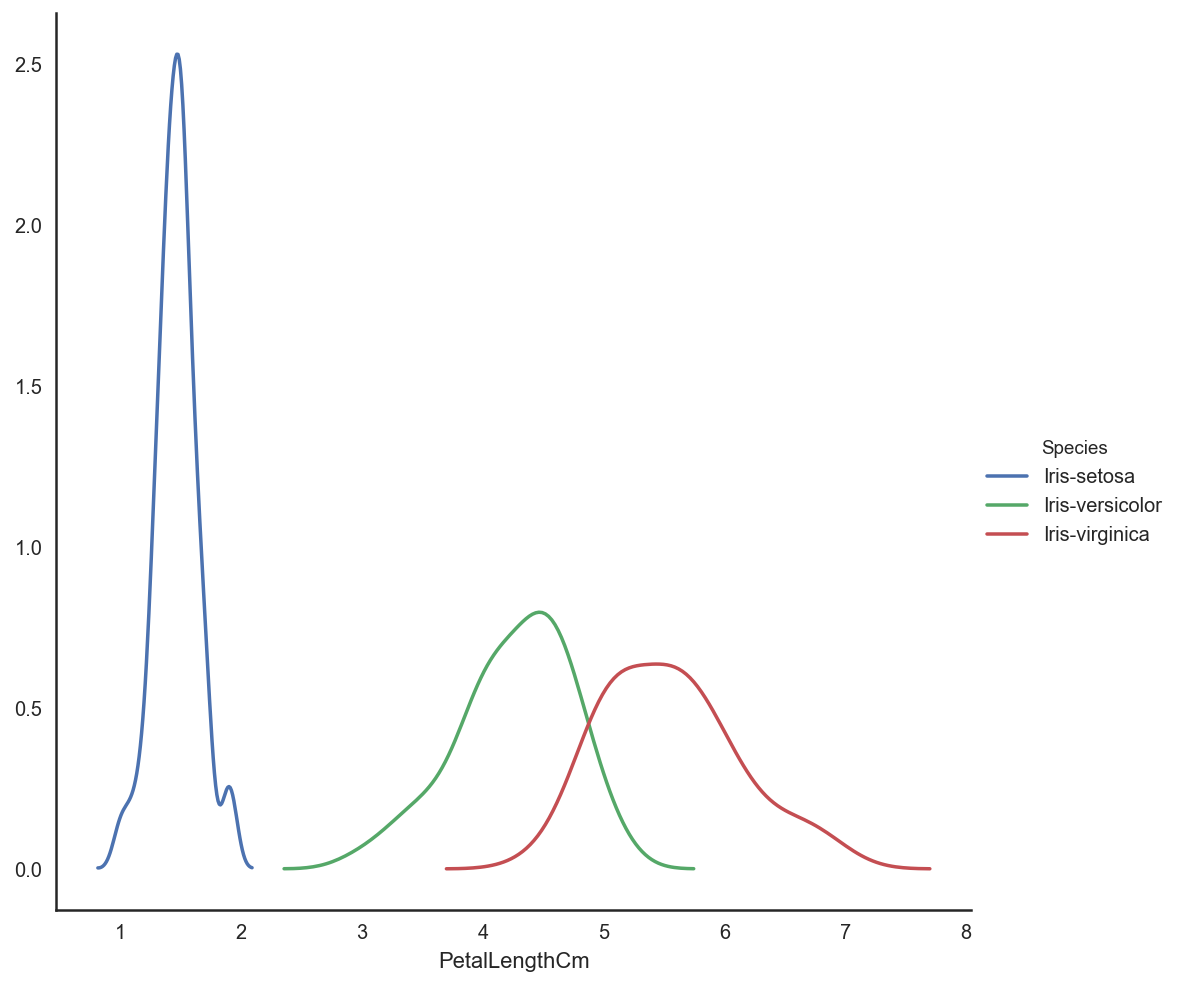

In [20]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=7).map(sns.kdeplot, "PetalLengthCm").add_legend()

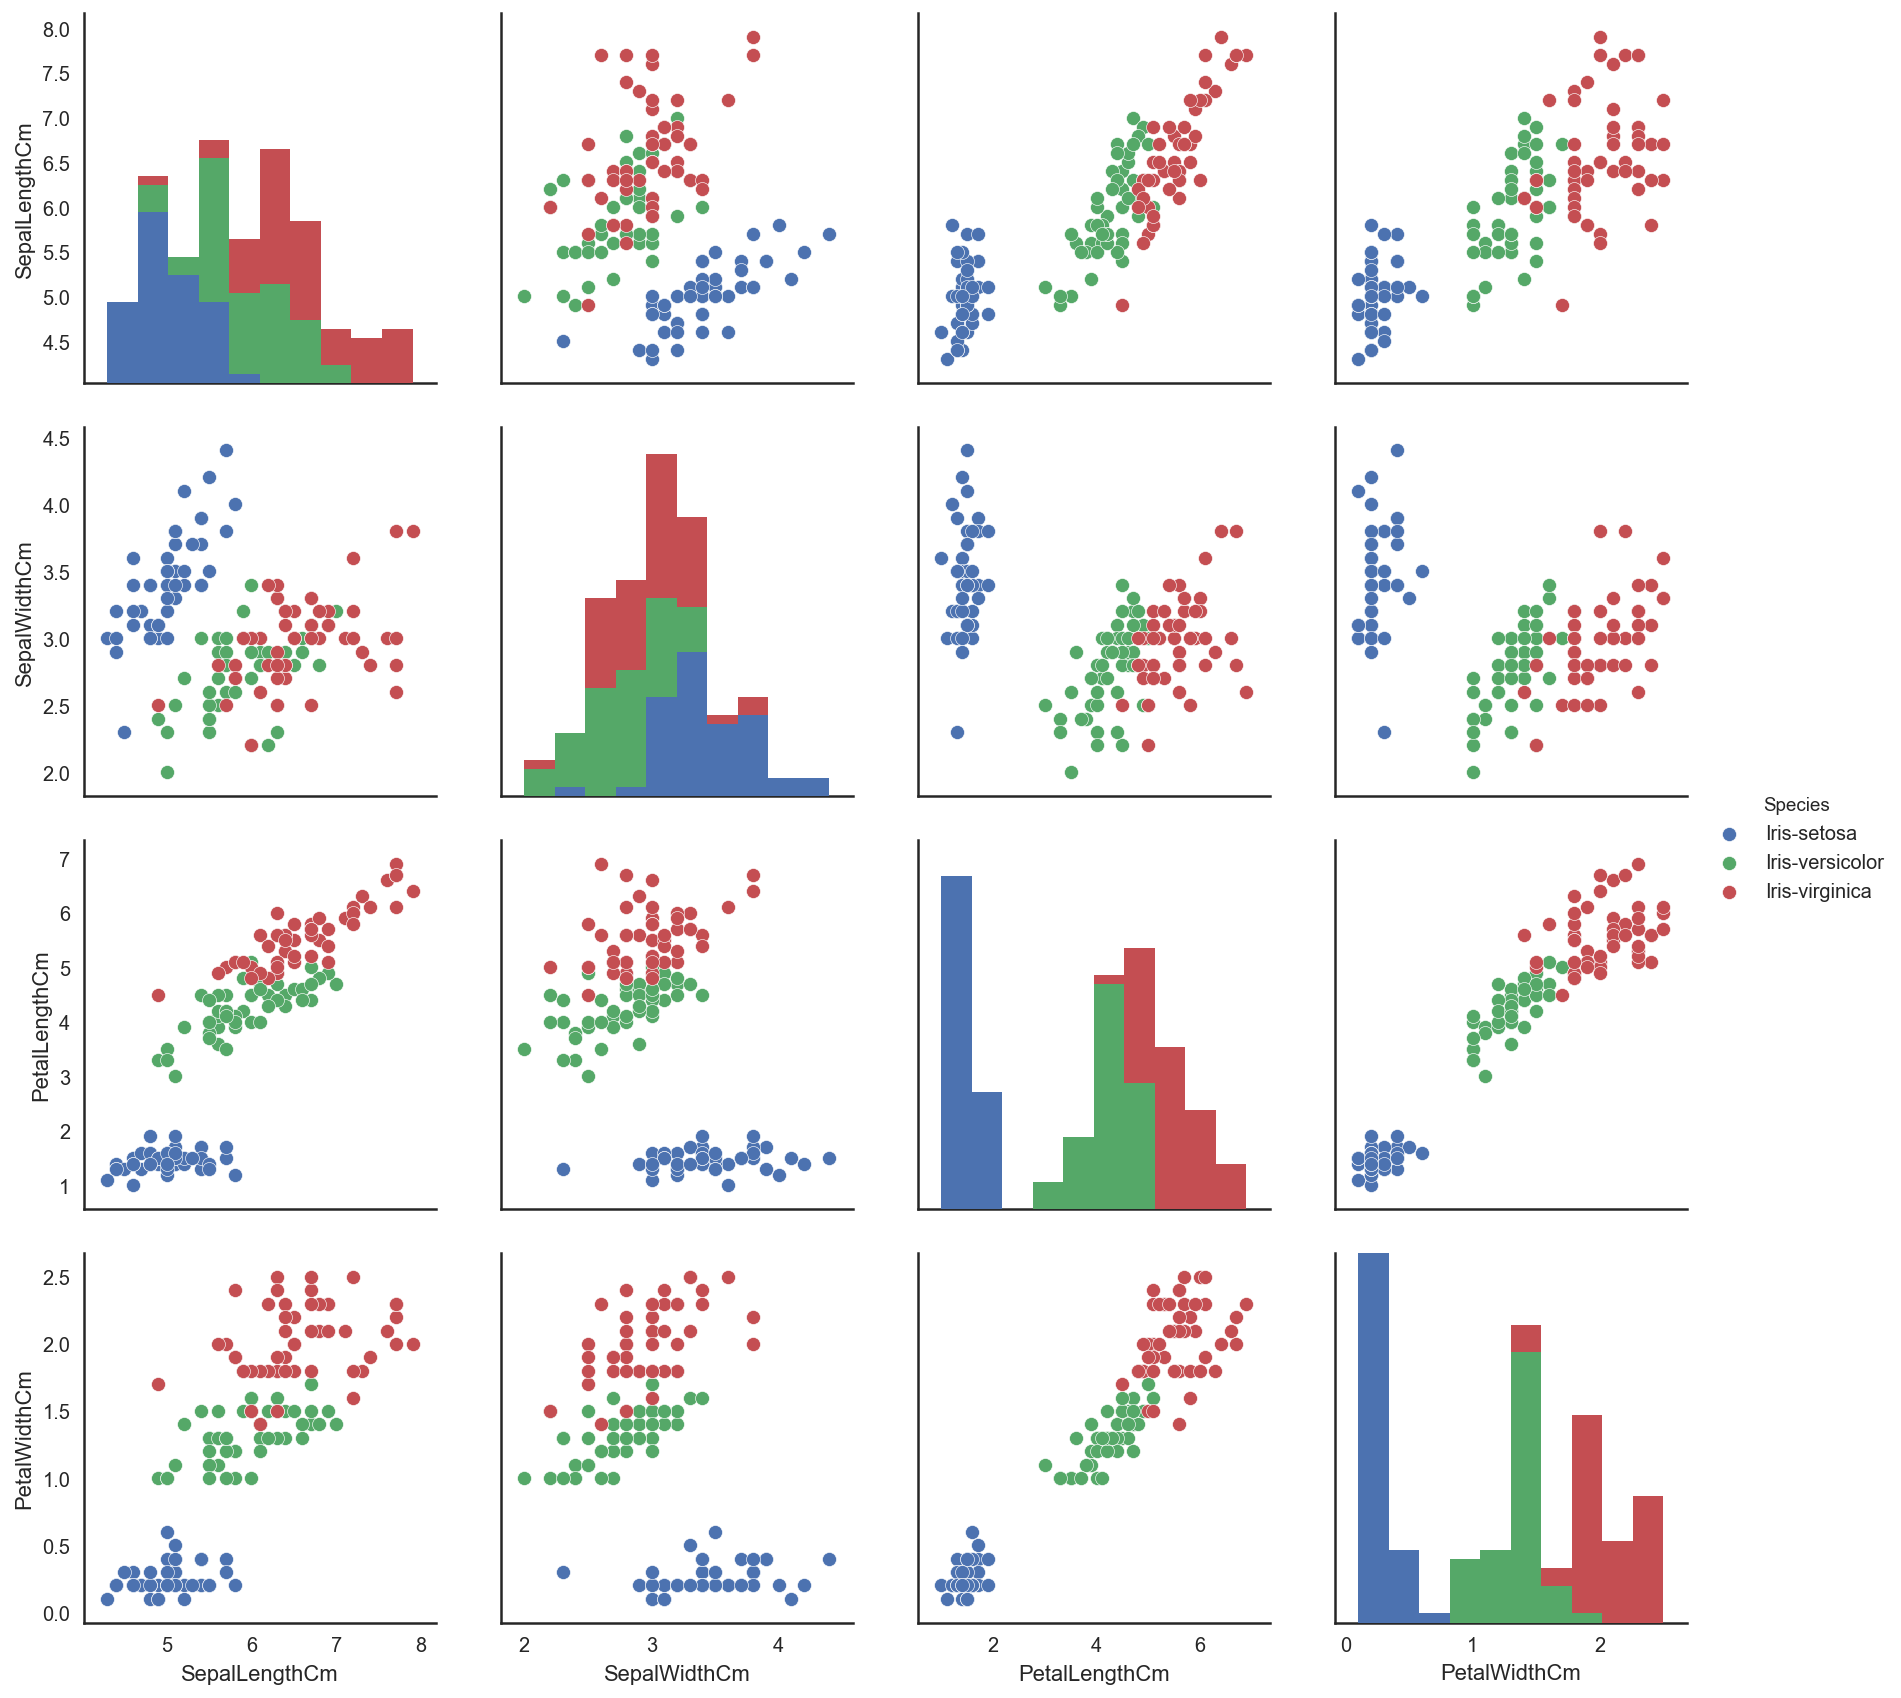

In [21]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="Species", size=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113003110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114742dd0>]], dtype=object)

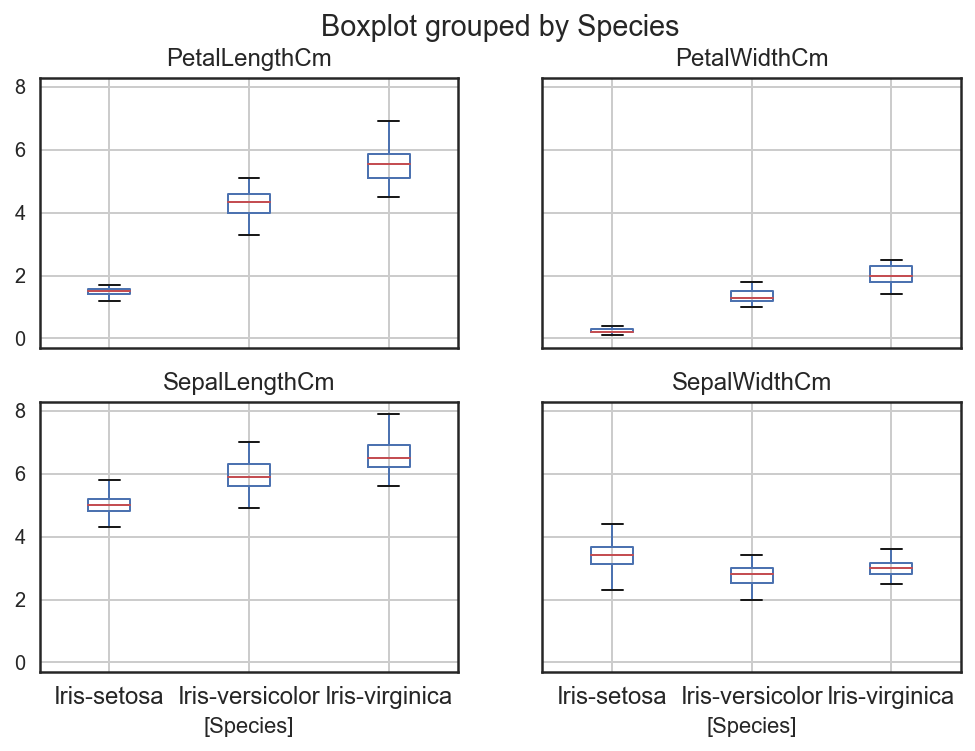

In [15]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="Species")

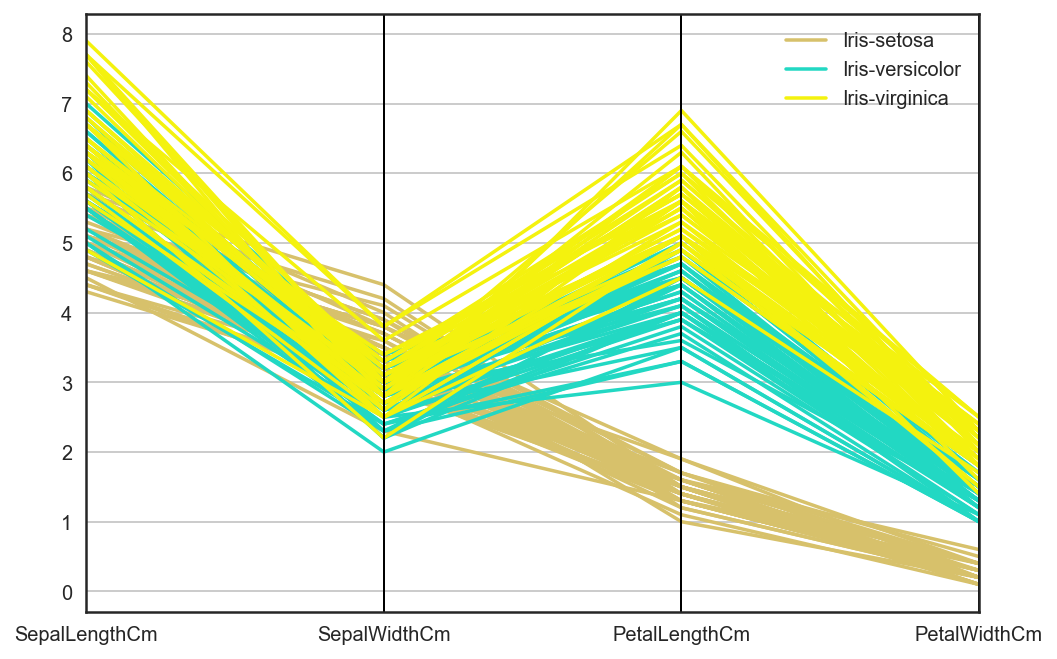

In [16]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
pd.tools.plotting.parallel_coordinates(iris, "Species")